# 4.9 Task PART2

This Notebook contains:
1. Import libraries and data
2. Data visualisation

## 01. Import libraries and data

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# Connect cloud to my Google Drive

from google.colab import drive
drive.mount('/content/gdrive')
!ls # will show you can now access the gdrive locally

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
# Set file path

path = "/content/gdrive/MyDrive/Colab Notebooks"

In [ ]:
# Import the latest merged data set

df= pd.read_pickle(os.path.join(path,'final_merge.pkl'))

In [ ]:
# Quick check of the imported data set

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 02. Data visualisation

### STEP1. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 1.0, 'Frequency of orders during the day')

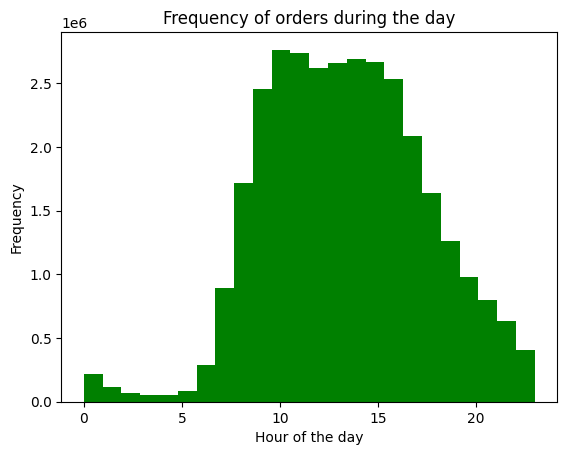

In [ ]:
# Create a histogram of the “order_hour_of_day” column

hist = df['order_hour_of_day'].plot.hist(color = ['green'], bins = 24) #24 bars for 24h
plt.xlabel("Hour of the day")
plt.title('Frequency of orders during the day') # adding labels to visualz

#### EXPLAIN: This plot confirms what we previously identified about the busiest time periods of the day: the least orders come at night time, whereas customers order the most during late mornings and early afternoon hours.

In [ ]:
# Export the histogram as image file

hist.figure.savefig(os.path.join(path, 'hist_24h.png'))

### STEP 2. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0.5, 1.0, 'Distribution of Orders by Loyalty')

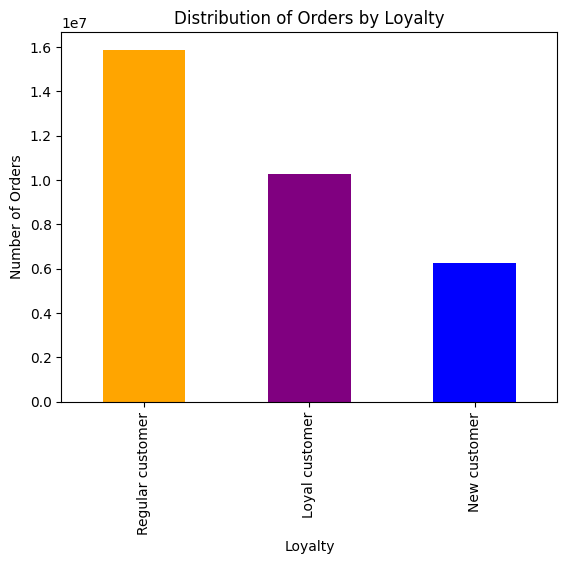

In [ ]:
# Create a Bar Chart for your “loyalty_flag” column

bar = df['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'purple', 'blue'])
plt.ylabel('Number of Orders')
plt.xlabel("Loyalty")
plt.title('Distribution of Orders by Loyalty') # adding labels to visualz

#### EXPLAIN: Regular customers generate the most orders, whereas loyal customers are average.

In [ ]:
# Export the bar chart as image file

bar.figure.savefig(os.path.join(path, 'bar_loyalty.png'))

### STEP3. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [ ]:
# Create a random sample 70/30

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

#### Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio

In [ ]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [ ]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

#### Check if new samples were created successfully -> if we add up the number of rows of both sample together, it should equal the numer of rows of original data frame

In [ ]:
len (df)

32404859

In [ ]:
len(big)+len(small)

32404859

#### They match!

In [ ]:
# Create a new dataframe that contains only the necessary columns for the line chart

df_2 = small[['order_hour_of_day','prices']]

In [ ]:
# Check output

df_2

,order_hour_of_day,prices
0,8,0.0
2,12,1.0
3,7,1.0
6,9,1.0
10,8,0.0
...,...,...
32404841,12,1.0
32404842,3,1.0
32404843,1,1.0
32404849,18,1.0


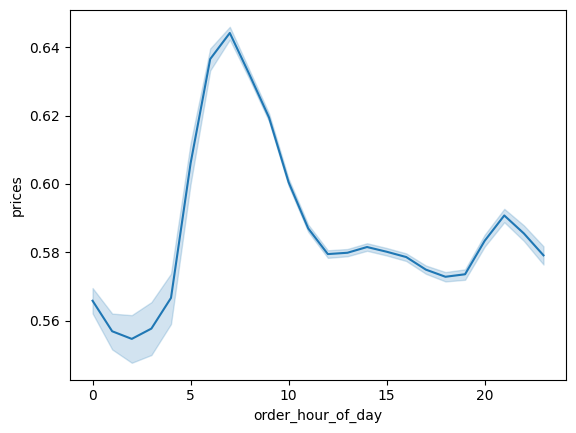

In [ ]:
# Create Line chart that shows the development of the “prices” column across 24h

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#### EXPLAIN: the plot shows that orders prices peak between 5-10 AM. In order to double check this correlation, we would need to use the whole df, which requeires a larger amount of memory to avoid crashes.

In [ ]:
# Export the line chart as image file

line.figure.savefig(os.path.join(path, 'line_pricebyhour.png'))

### STEP4. Now that you have information about customers, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [ ]:
# Create a subset of 'n_dependants' and 'age'

df_3 = small[['number_of_dependents', 'age']]

In [ ]:
# Check output

df_3

,number_of_dependents,age
0,3,31
2,3,31
3,3,31
6,3,31
10,3,31
...,...,...
32404841,0,25
32404842,0,25
32404843,0,25
32404849,0,25


In [ ]:
df_3['age'].max()

81

In [ ]:
df_3['age'].min()

18

In [ ]:
df_3['number_of_dependents'].max()

3

In [ ]:
df_3['number_of_dependents'].min()

0

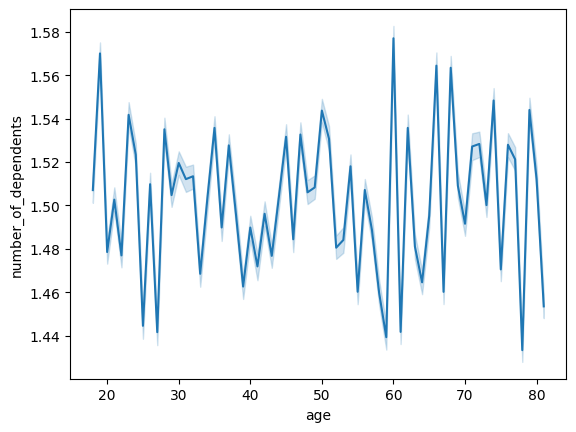

In [ ]:
# Create Line chart that represents the connection between age & number of dependents

line_3 = sns.lineplot(data = df_3, y = 'number_of_dependents',x = 'age')

#### EXPLAIN: There seem to be no direct correlation between the two variables.

In [ ]:
# Export the line chart as image file

line_3.figure.savefig(os.path.join(path, 'line_family_age.png'))

### STEP 5. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

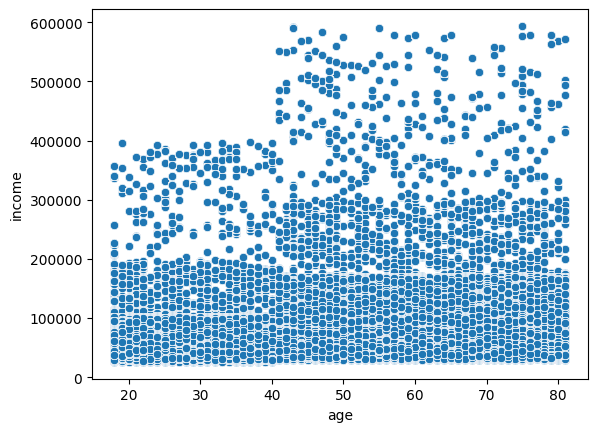

In [ ]:
# Create a scatterplot to visualize the distribution of income by age

scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df)

#### EXPLAIN: The highest income group (> 400k) starts at 40+ age group, so the older the more spending power.

In [ ]:
# Export the line chart as image file

scatterplot.figure.savefig(os.path.join(path, 'scatter_income_age.png'))